# Twitter Analysis: Tweets

By: Jennifer Johnson

Exploratory Data Analysis 
- Original analysis using all tweets

In [118]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno as msno
import geopandas as gpd
from shapely.geometry import Point, Polygon
#import shapefile as shp

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# Load the dataset into dataframe
tweets_df = pd.read_csv('D:/development/CSDA1050/playground/twitter_jj/twitter_tweets_new.csv')

In [120]:
tweets_df.head()

,emojis,hashtags,id,language,latitude,longitude,mentions,place_bbcoordinates,place_bbtype,place_country,...,quoted_text,reply_to_status,reply_to_user,sensitive,sentiment,source,tweet_date,tweet_text,user_id,user_name
0,[':red_heart:'],NaN,1107369998148788224,en,NaN,NaN,NaN,"[[[-79.583667, 43.550871], [-79.583667, 43.550...",Polygon,Canada,...,NaN,NaN,NaN,False,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",Twitter for iPhone,2019-03-17 19:55:56.155,Loving the vibes :red_heart:️ https://t.co/X8v...,908049944040361984,wikki_87
1,[],NaN,1107370010182324229,und,NaN,NaN,"['Rosalestri', 'Cnyari']","[[[-80.248423, 43.050553], [-80.248423, 43.470...",Polygon,Canada,...,NaN,1.107354e+18,Rosalestri,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Twitter for Android,2019-03-17 19:55:59.024,@Rosalestri @Cnyari Olé,16801721,njsh2008
2,"[':sun_with_face:', ':goat:', ':rainbow:']","['kickassvegetables', 'heermancefarmpurveyors']",1107370015932796931,en,42.0450,-73.862222,NaN,"[[[-79.76259, 40.477383], [-79.76259, 45.01585...",Polygon,United States,...,NaN,NaN,NaN,False,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",Instagram,2019-03-17 19:56:00.395,Happy Sunday to all and have a wonderful day!!...,1620428460,HeermanceFarm
3,[],['Repost'],1107370018730180608,en,43.7166,-79.340700,['MichaelDesbiens'],"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canadá,...,NaN,NaN,NaN,False,"{'neg': 0.108, 'neu': 0.676, 'pos': 0.216, 'co...",Instagram,2019-03-17 19:56:01.062,#Repost @michaeldesbiens\n・・・\nI have been tol...,53528503,JimVives
4,"[':fearful_face:', ':fearful_face:', ':flushed...",NaN,1107370005883023360,ko,NaN,NaN,['BTS_twt'],"[[[-95.155898, 41.676329], [-95.155898, 56.852...",Polygon,Canada,...,NaN,NaN,BTS_twt,False,"{'neg': 0.187, 'neu': 0.51, 'pos': 0.304, 'com...",Twitter for iPhone,2019-03-17 19:55:57.999,"@BTS_twt 김태형, 밴드에이드? :fearful_face::fearful_fa...",828139192035196928,BangtanBabeXO


In [121]:
tweets_df.shape

(184056, 24)

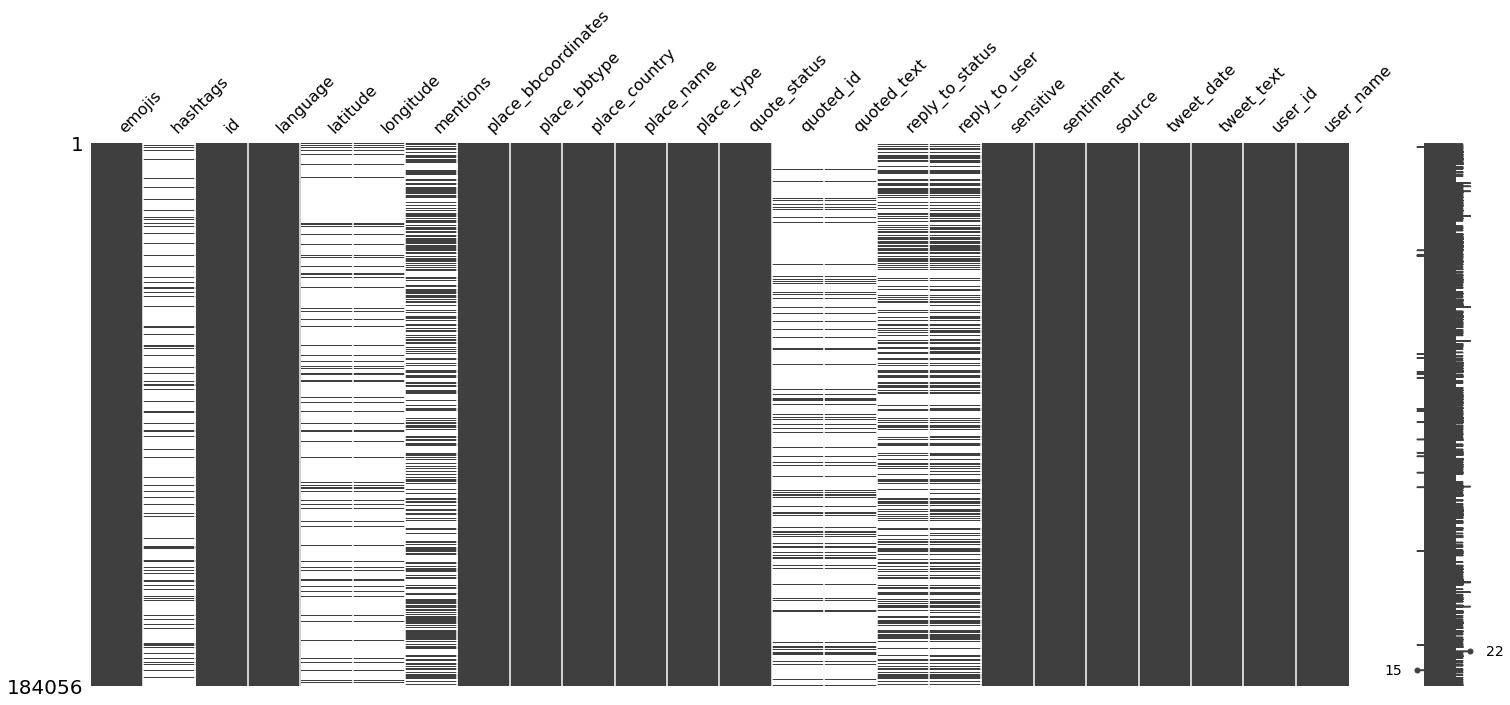

In [122]:
# check for missing data
msno.matrix(tweets_df)

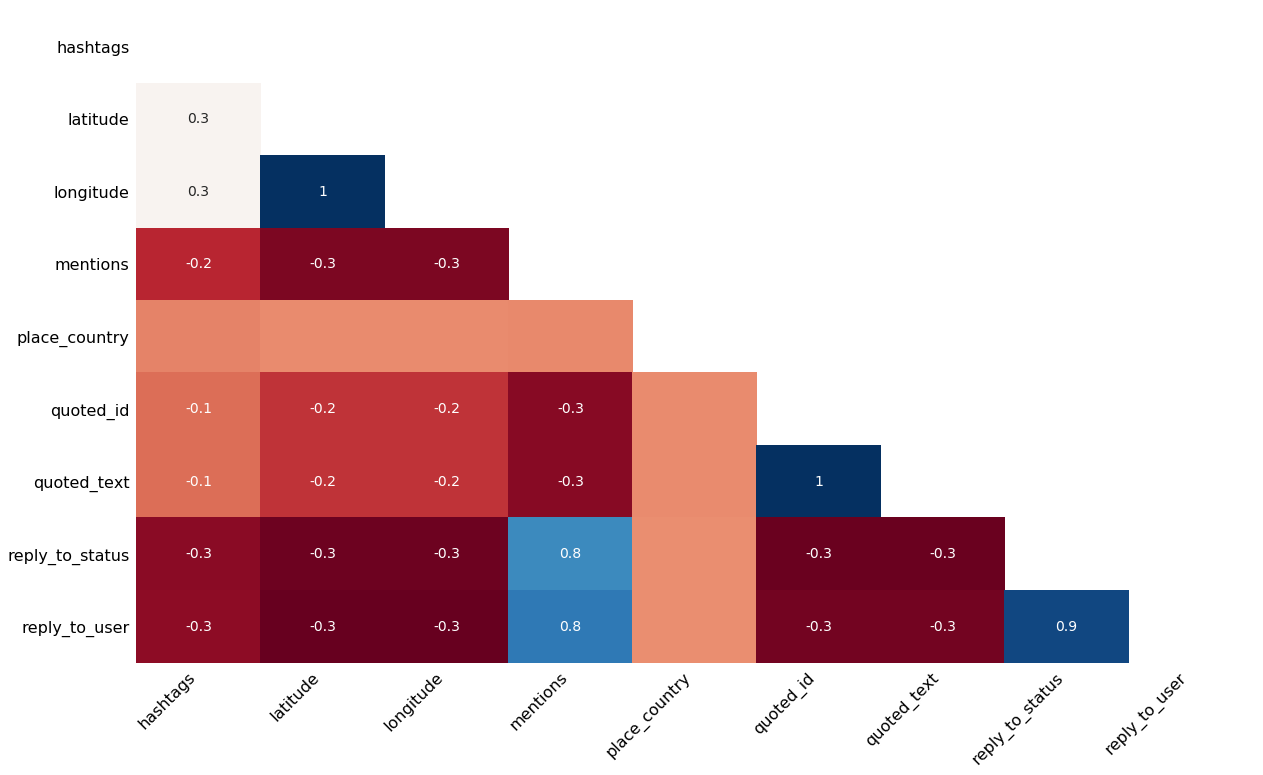

In [123]:
# missing correlation matrix
msno.heatmap(tweets_df)

In [124]:
# changing tweet_date to DateTime column
tweets_df.tweet_date = pd.to_datetime(tweets_df['tweet_date'])

In [125]:
tweets_df.dtypes

emojis                         object
hashtags                       object
id                              int64
language                       object
latitude                      float64
longitude                     float64
mentions                       object
place_bbcoordinates            object
place_bbtype                   object
place_country                  object
place_name                     object
place_type                     object
quote_status                     bool
quoted_id                     float64
quoted_text                    object
reply_to_status               float64
reply_to_user                  object
sensitive                        bool
sentiment                      object
source                         object
tweet_date             datetime64[ns]
tweet_text                     object
user_id                         int64
user_name                      object
dtype: object

In [126]:
# Tweets by Date
# See how many tweets come in at a time from streaming
tweets_df['tweet_time'] = tweets_df['tweet_date'].values.astype('datetime64[m]')
tweets_date = tweets_df.groupby('tweet_time').id.agg('count').to_frame('count')#.reset_index()

In [127]:
tweets_date.head()

,count
tweet_time,
2019-03-17 19:55:00,3
2019-03-17 19:56:00,14
2019-03-17 19:57:00,15
2019-03-17 19:58:00,15
2019-03-17 19:59:00,18


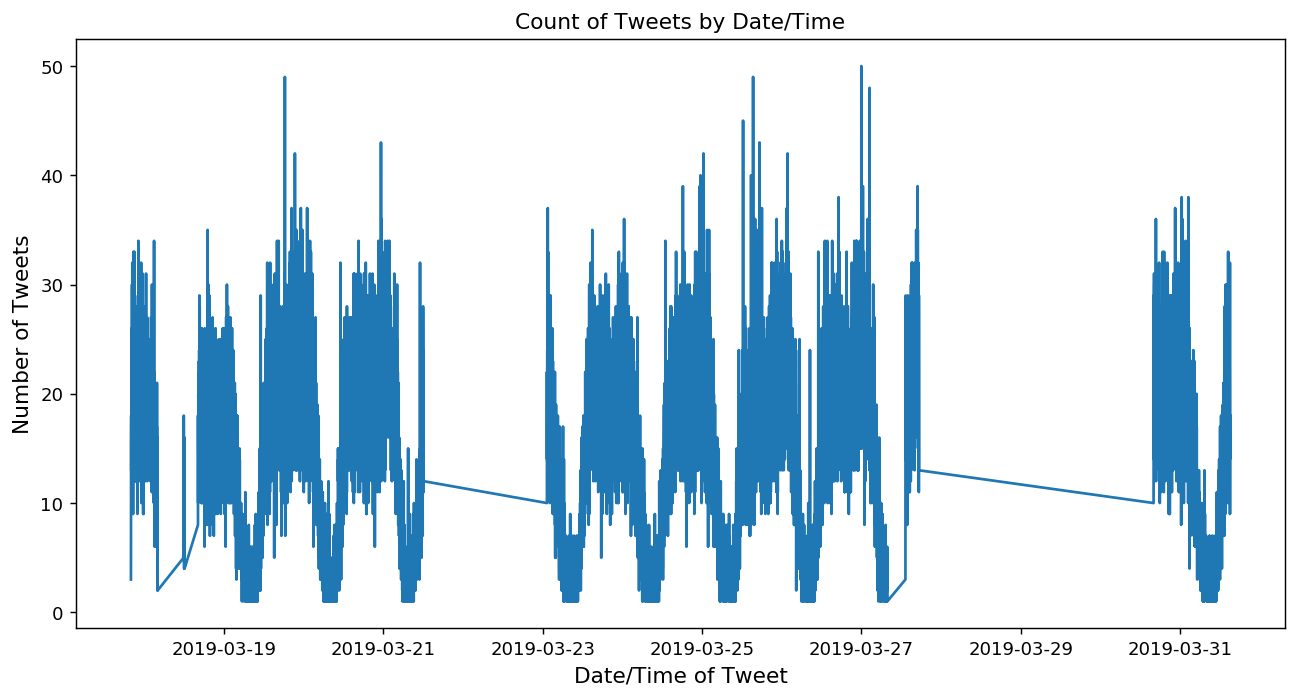

In [128]:
plt.figure(figsize=(12,6), dpi=130)
plt.xlabel('Date/Time of Tweet', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.title('Count of Tweets by Date/Time')
plt.plot(tweets_date)
plt.show()

In [129]:
tweets_df['tweet_dt']= tweets_df['tweet_date'].dt.normalize()
# Number of Tweets by Day
tweets_day = tweets_df.groupby('tweet_dt')['id'].count()

In [130]:
tweets_day.head()

tweet_dt
2019-03-17     4884
2019-03-18    12617
2019-03-19    20581
2019-03-20    21585
2019-03-21     8662
Name: id, dtype: int64

[Text(0,0,'2019-03-17'),
 Text(0,0,'2019-03-18'),
 Text(0,0,'2019-03-19'),
 Text(0,0,'2019-03-20'),
 Text(0,0,'2019-03-21'),
 Text(0,0,'2019-03-23'),
 Text(0,0,'2019-03-24'),
 Text(0,0,'2019-03-25'),
 Text(0,0,'2019-03-26'),
 Text(0,0,'2019-03-27'),
 Text(0,0,'2019-03-30'),
 Text(0,0,'2019-03-31')]

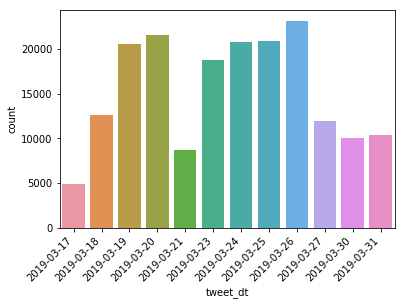

In [131]:
ax = sns.countplot(x='tweet_dt', data=tweets_df)
x_dates = tweets_df['tweet_dt'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [132]:
#tweets_df['tweet_hour']= pd.to_datetime(tweets_df['tweet_date'],format= '%H').dt.time
tweets_df['tweet_hour'] = tweets_df.tweet_date.dt.hour

In [133]:
# Number of Tweets by Time of Day
tweets_tod = tweets_df.groupby('tweet_hour')['id'].count()

In [134]:
tweets_tod.head()

tweet_hour
0    11403
1    12639
2    11688
3     8939
4     5977
Name: id, dtype: int64

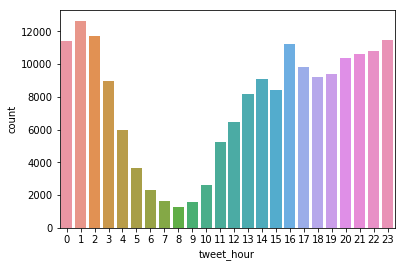

In [135]:
ax = sns.countplot(x='tweet_hour', data=tweets_df)
#x_dates = tweets_df['tweet_hour'].dt.strftime('%Y-%m-%d').sort_values().unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [136]:
tweets_df['tweet_dow'] = pd.to_datetime(tweets_df['tweet_date']).dt.dayofweek

In [137]:
# Number of Tweets by Day of Week
tweets_dow = tweets_df.groupby('tweet_dow')['id'].count()

In [138]:
tweets_dow.head()

tweet_dow
0    33466
1    43695
2    33477
3     8662
5    28775
Name: id, dtype: int64

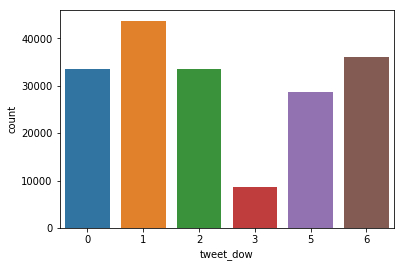

In [139]:
ax = sns.countplot(x='tweet_dow', data=tweets_df)
#x_dates = tweets_df['tweet_dt'].dt.strftime('%Y-%m-%d').sort_values().unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

In [140]:
# Number of Tweets by User
tweets_users = tweets_df.groupby('user_name')['id'].count() \
.reset_index(name='count') \
.sort_values(['count'], ascending=False)

In [141]:
tweets_users.head()

,user_name,count
23740,sunowos,1732
24576,tofire,1415
17134,gleexhy,1382
159,511NY,1101
14406,biggles14,740


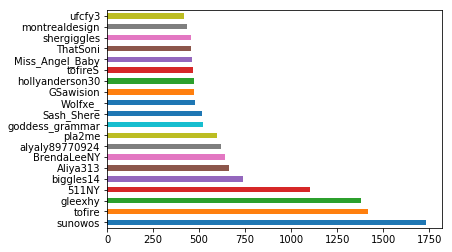

In [142]:
tweets_df['user_name'].value_counts()[:20].plot(kind='barh')

In [143]:
tweets_map_df = tweets_df[tweets_df.latitude.notnull()]

In [144]:
tweets_map_df.head()

,emojis,hashtags,id,language,latitude,longitude,mentions,place_bbcoordinates,place_bbtype,place_country,...,sentiment,source,tweet_date,tweet_text,user_id,user_name,tweet_time,tweet_dt,tweet_hour,tweet_dow
2,"[':sun_with_face:', ':goat:', ':rainbow:']","['kickassvegetables', 'heermancefarmpurveyors']",1107370015932796931,en,42.045000,-73.862222,NaN,"[[[-79.76259, 40.477383], [-79.76259, 45.01585...",Polygon,United States,...,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",Instagram,2019-03-17 19:56:00.395,Happy Sunday to all and have a wonderful day!!...,1620428460,HeermanceFarm,2019-03-17 19:56:00,2019-03-17,19,6
3,[],['Repost'],1107370018730180608,en,43.716600,-79.340700,['MichaelDesbiens'],"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canadá,...,"{'neg': 0.108, 'neu': 0.676, 'pos': 0.216, 'co...",Instagram,2019-03-17 19:56:01.062,#Repost @michaeldesbiens\n・・・\nI have been tol...,53528503,JimVives,2019-03-17 19:56:00,2019-03-17,19,6
6,[],"['torontocontractors', 'renovation', 'interior...",1107370085608538113,en,43.716600,-79.340700,NaN,"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canada,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Instagram,2019-03-17 19:56:17.007,"Before and after, big different....\n.\n.\n.\n...",349291874,905RENO,2019-03-17 19:56:00,2019-03-17,19,6
7,[],NaN,1107370127874580482,en,43.670060,-79.395480,['DinaAlonzi'],"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canada,...,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",Instagram,2019-03-17 19:56:27.084,Simple yet Elegant. . . We love the look of wh...,122201354,DinaAlonzi,2019-03-17 19:56:00,2019-03-17,19,6
12,[],['pogey'],1107370170467663873,en,43.886417,-78.912659,"['BollocksBar', 'merimacband']","[[[-79.047315, 43.589036], [-79.047315, 44.028...",Polygon,Canada,...,"{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...",Instagram,2019-03-17 19:56:37.239,Some fine Irish dancing at the @BollocksBar! M...,134236541,gradybrothers,2019-03-17 19:56:00,2019-03-17,19,6


In [145]:
tweets_map_df.shape

(25262, 28)

In [148]:
import nltk

In [149]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
import string

In [151]:
translator = str.maketrans('', '', string.punctuation)

In [152]:
# Remove punctuation from tweet text
tweets_df['tweet_clean'] = tweets_df['tweet_text'].str.translate(translator)

In [153]:
# Lower case and split words
tweets_df['tweet_clean'] = tweets_df['tweet_clean'].str.lower().str.split()

In [154]:
tweets_df.head()

,emojis,hashtags,id,language,latitude,longitude,mentions,place_bbcoordinates,place_bbtype,place_country,...,source,tweet_date,tweet_text,user_id,user_name,tweet_time,tweet_dt,tweet_hour,tweet_dow,tweet_clean
0,[':red_heart:'],NaN,1107369998148788224,en,NaN,NaN,NaN,"[[[-79.583667, 43.550871], [-79.583667, 43.550...",Polygon,Canada,...,Twitter for iPhone,2019-03-17 19:55:56.155,Loving the vibes :red_heart:️ https://t.co/X8v...,908049944040361984,wikki_87,2019-03-17 19:55:00,2019-03-17,19,6,"[loving, the, vibes, redheart️, httpstcox8v0lw..."
1,[],NaN,1107370010182324229,und,NaN,NaN,"['Rosalestri', 'Cnyari']","[[[-80.248423, 43.050553], [-80.248423, 43.470...",Polygon,Canada,...,Twitter for Android,2019-03-17 19:55:59.024,@Rosalestri @Cnyari Olé,16801721,njsh2008,2019-03-17 19:55:00,2019-03-17,19,6,"[rosalestri, cnyari, olé]"
2,"[':sun_with_face:', ':goat:', ':rainbow:']","['kickassvegetables', 'heermancefarmpurveyors']",1107370015932796931,en,42.0450,-73.862222,NaN,"[[[-79.76259, 40.477383], [-79.76259, 45.01585...",Polygon,United States,...,Instagram,2019-03-17 19:56:00.395,Happy Sunday to all and have a wonderful day!!...,1620428460,HeermanceFarm,2019-03-17 19:56:00,2019-03-17,19,6,"[happy, sunday, to, all, and, have, a, wonderf..."
3,[],['Repost'],1107370018730180608,en,43.7166,-79.340700,['MichaelDesbiens'],"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canadá,...,Instagram,2019-03-17 19:56:01.062,#Repost @michaeldesbiens\n・・・\nI have been tol...,53528503,JimVives,2019-03-17 19:56:00,2019-03-17,19,6,"[repost, michaeldesbiens, ・・・, i, have, been, ..."
4,"[':fearful_face:', ':fearful_face:', ':flushed...",NaN,1107370005883023360,ko,NaN,NaN,['BTS_twt'],"[[[-95.155898, 41.676329], [-95.155898, 56.852...",Polygon,Canada,...,Twitter for iPhone,2019-03-17 19:55:57.999,"@BTS_twt 김태형, 밴드에이드? :fearful_face::fearful_fa...",828139192035196928,BangtanBabeXO,2019-03-17 19:55:00,2019-03-17,19,6,"[btstwt, 김태형, 밴드에이드, fearfulfacefearfulface, w..."


In [155]:
from nltk.corpus import stopwords
stop_en = stopwords.words("english")

In [156]:
tweets_df['tweet_clean'] = tweets_df['tweet_clean'].apply(lambda x: [item for item in x if item not in stop_en])

In [157]:
tweets_df['tweet_clean'] = tweets_df['tweet_clean'].apply(' '.join)

In [158]:
tweets_df.head()

,emojis,hashtags,id,language,latitude,longitude,mentions,place_bbcoordinates,place_bbtype,place_country,...,source,tweet_date,tweet_text,user_id,user_name,tweet_time,tweet_dt,tweet_hour,tweet_dow,tweet_clean
0,[':red_heart:'],NaN,1107369998148788224,en,NaN,NaN,NaN,"[[[-79.583667, 43.550871], [-79.583667, 43.550...",Polygon,Canada,...,Twitter for iPhone,2019-03-17 19:55:56.155,Loving the vibes :red_heart:️ https://t.co/X8v...,908049944040361984,wikki_87,2019-03-17 19:55:00,2019-03-17,19,6,loving vibes redheart️ httpstcox8v0lw3wmj
1,[],NaN,1107370010182324229,und,NaN,NaN,"['Rosalestri', 'Cnyari']","[[[-80.248423, 43.050553], [-80.248423, 43.470...",Polygon,Canada,...,Twitter for Android,2019-03-17 19:55:59.024,@Rosalestri @Cnyari Olé,16801721,njsh2008,2019-03-17 19:55:00,2019-03-17,19,6,rosalestri cnyari olé
2,"[':sun_with_face:', ':goat:', ':rainbow:']","['kickassvegetables', 'heermancefarmpurveyors']",1107370015932796931,en,42.0450,-73.862222,NaN,"[[[-79.76259, 40.477383], [-79.76259, 45.01585...",Polygon,United States,...,Instagram,2019-03-17 19:56:00.395,Happy Sunday to all and have a wonderful day!!...,1620428460,HeermanceFarm,2019-03-17 19:56:00,2019-03-17,19,6,happy sunday wonderful day sunwithfacegoatrain...
3,[],['Repost'],1107370018730180608,en,43.7166,-79.340700,['MichaelDesbiens'],"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canadá,...,Instagram,2019-03-17 19:56:01.062,#Repost @michaeldesbiens\n・・・\nI have been tol...,53528503,JimVives,2019-03-17 19:56:00,2019-03-17,19,6,repost michaeldesbiens ・・・ told post many pict...
4,"[':fearful_face:', ':fearful_face:', ':flushed...",NaN,1107370005883023360,ko,NaN,NaN,['BTS_twt'],"[[[-95.155898, 41.676329], [-95.155898, 56.852...",Polygon,Canada,...,Twitter for iPhone,2019-03-17 19:55:57.999,"@BTS_twt 김태형, 밴드에이드? :fearful_face::fearful_fa...",828139192035196928,BangtanBabeXO,2019-03-17 19:55:00,2019-03-17,19,6,btstwt 김태형 밴드에이드 fearfulfacefearfulface cut ho...


In [159]:
from wordcloud import WordCloud

In [160]:
all_words = ' '.join([text for text in tweets_df['tweet_clean']])

In [161]:
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(all_words)

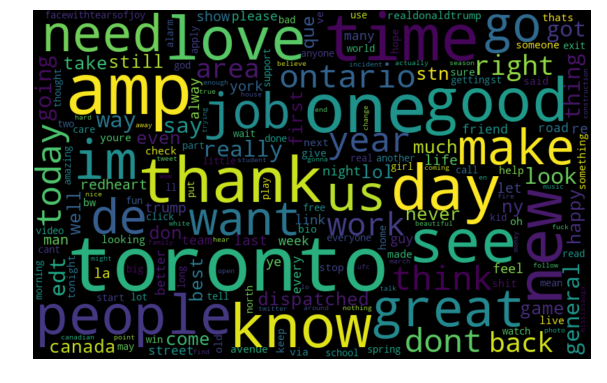

In [162]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [167]:
# count of words
words = nltk.tokenize.word_tokenize(all_words)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,’,33207
1,s,12195
2,like,9674
3,toronto,8512
4,t,8241


In [168]:
rslt_words = rslt[rslt['Word'].str.len() > 1]

In [169]:
rslt_words.head()

,Word,Frequency
2,like,9674
3,toronto,8512
5,amp,7305
7,one,6411
8,get,6370


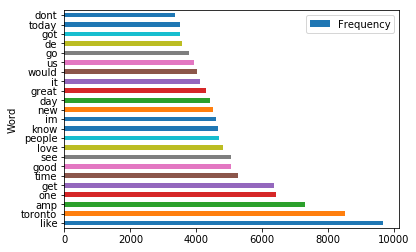

In [170]:
ax = rslt_words.plot.barh(x='Word', y='Frequency')

In [171]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:
# Filter for tweets with hashtags
tweets_hash_df = tweets_df[tweets_df.hashtags.notnull()]

In [173]:
import ast

In [174]:
tweets_hash_df['hashtags'] = tweets_hash_df['hashtags'].apply(ast.literal_eval)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
tweets_hash_df['hash'] = tweets_hash_df['hashtags'].apply(', '.join).str.lower()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
hash_words = ', '.join([text for text in tweets_hash_df['hash']])

In [177]:
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(hash_words)

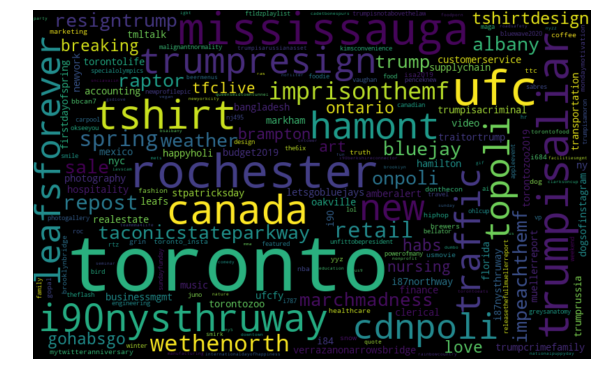

In [178]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [179]:
# remove punctuation
tweets_hash_df['hash'] = tweets_hash_df['hash'].str.translate(translator)

a = tweets_hash_df['hash'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Word,Frequency
0,toronto,1572
1,ufc,410
2,rochester,369
3,mississauga,336
4,trumpisaliar,313


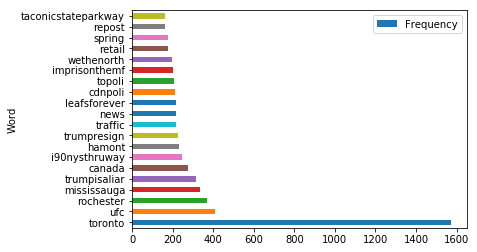

In [180]:
ax = rslt.plot.barh(x='Word', y='Frequency')

In [181]:
# Filter for tweets with emojis
tweets_emoji_df = tweets_df[tweets_df.hashtags.notnull()]

In [182]:
import ast

In [183]:
tweets_df['emojis'] = tweets_df['emojis'].apply(ast.literal_eval)

In [184]:
tweets_df['emo'] = tweets_df['emojis'].apply(', '.join).str.lower()

In [185]:
emoji_words = ', '.join([text for text in tweets_df['emo']])

In [186]:
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(emoji_words)

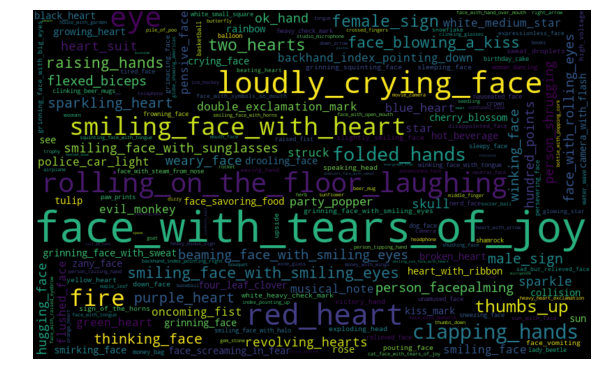

In [187]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [188]:
# remove punctuation
#tweets_df['emojis'] = tweets_df['emojis'].str.translate(translator)
tweets_df['emo'] = tweets_df['emo'].str.replace(":,", "").str.strip()



a = tweets_df['emo'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt = rslt.drop(rslt.index[0])
rslt.head()

,Word,Frequency
1,face_with_tears_of_joy,8609
2,loudly_crying_face,3757
3,red_heart,3573
4,rolling_on_the_floor_laughing,3241
5,smiling_face_with_heart-eyes,2641


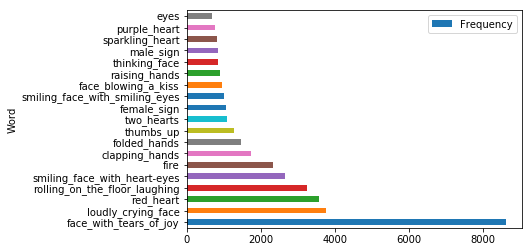

In [189]:
ax = rslt.plot.barh(x='Word', y='Frequency')

In [190]:
# Filter for tweets with mentions
tweets_mentions_df = tweets_df[tweets_df.mentions.notnull()]

In [191]:
import ast

In [192]:
tweets_mentions_df['mentions'] = tweets_mentions_df['mentions'].apply(ast.literal_eval)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [193]:
tweets_mentions_df['ment'] = tweets_mentions_df['mentions'].apply(', '.join).str.lower()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
mentions_words = ', '.join([text for text in tweets_mentions_df['ment']])

In [195]:
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(mentions_words)

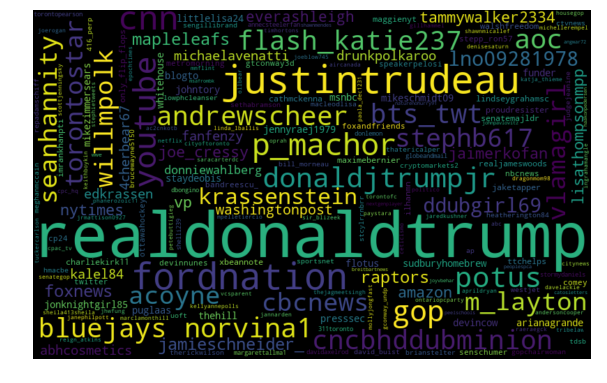

In [196]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [197]:
# remove punctuation
#tweets_hash_df['hash'] = tweets_hash_df['hash'].str.translate(translator)
tweets_mentions_df['ment'] = tweets_mentions_df['ment'].str.replace(",", "").str.strip()

a = tweets_mentions_df['ment'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

rslt = pd.DataFrame(word_dist.most_common(20),
                    columns=['Word', 'Frequency'])
rslt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Word,Frequency
0,realdonaldtrump,1719
1,justintrudeau,420
2,fordnation,374
3,cnn,322
4,youtube,288


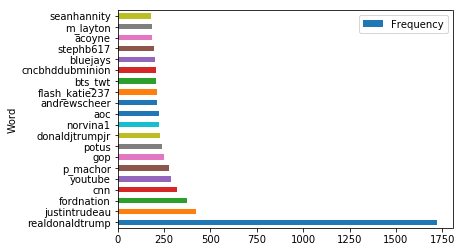

In [198]:
ax = rslt.plot.barh(x='Word', y='Frequency')

In [199]:
# split sentiment into multiple columns (compound, neg, pos, neu)
tweets_df['sentiment'] = tweets_df['sentiment'].apply(lambda x: dict(eval(x)))
tweets_sent = tweets_df['sentiment'].apply(pd.Series)

In [200]:
tweets_df2 = pd.concat([tweets_df, tweets_sent], axis=1).drop('sentiment', axis=1)

In [201]:
tweets_df2.head()

,emojis,hashtags,id,language,latitude,longitude,mentions,place_bbcoordinates,place_bbtype,place_country,...,tweet_time,tweet_dt,tweet_hour,tweet_dow,tweet_clean,emo,compound,neg,neu,pos
0,[:red_heart:],NaN,1107369998148788224,en,NaN,NaN,NaN,"[[[-79.583667, 43.550871], [-79.583667, 43.550...",Polygon,Canada,...,2019-03-17 19:55:00,2019-03-17,19,6,loving vibes redheart️ httpstcox8v0lw3wmj,:red_heart:,0.5994,0.000,0.506,0.494
1,[],NaN,1107370010182324229,und,NaN,NaN,"['Rosalestri', 'Cnyari']","[[[-80.248423, 43.050553], [-80.248423, 43.470...",Polygon,Canada,...,2019-03-17 19:55:00,2019-03-17,19,6,rosalestri cnyari olé,,0.0000,0.000,1.000,0.000
2,"[:sun_with_face:, :goat:, :rainbow:]","['kickassvegetables', 'heermancefarmpurveyors']",1107370015932796931,en,42.0450,-73.862222,NaN,"[[[-79.76259, 40.477383], [-79.76259, 45.01585...",Polygon,United States,...,2019-03-17 19:56:00,2019-03-17,19,6,happy sunday wonderful day sunwithfacegoatrain...,:sun_with_face :goat :rainbow:,0.8395,0.000,0.680,0.320
3,[],['Repost'],1107370018730180608,en,43.7166,-79.340700,['MichaelDesbiens'],"[[[-79.639319, 43.403221], [-79.639319, 43.855...",Polygon,Canadá,...,2019-03-17 19:56:00,2019-03-17,19,6,repost michaeldesbiens ・・・ told post many pict...,,0.7003,0.108,0.676,0.216
4,"[:fearful_face:, :fearful_face:, :flushed_face:]",NaN,1107370005883023360,ko,NaN,NaN,['BTS_twt'],"[[[-95.155898, 41.676329], [-95.155898, 56.852...",Polygon,Canada,...,2019-03-17 19:55:00,2019-03-17,19,6,btstwt 김태형 밴드에이드 fearfulfacefearfulface cut ho...,:fearful_face :fearful_face :flushed_face:,0.5330,0.187,0.510,0.304
